# What are Convolutional Neural Networks?

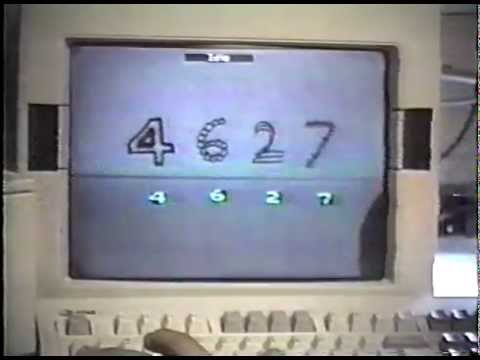

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('FwFduRA_L6Q', width=800, height=600)

## History
These type of neural networks have come to dominate many aspects of deep learning in the modern world, but what exactly are they?

### Biology
Well, in order to answer this question we should start at the beginning, about 30 years before Yann LeCun introduced LeNet (see video above). We actually go back to human biology and research on the visual cortex. It was in 1959 when David Hubel and Torsten Wiesel described the notion of "simple" versus "complex" cells. "Simple" cells were spatially invariant, that is they stayed in one place, where "complex" cells were not. They found that by summing the outputs of several "simple" cells they could produce a "complex" cell in the human visual cortex. This idea of summing together small "simple" filters together to form a more "complex" structure is the basis of convolutional neural networks.

### Perceptrons and Neocognitron
Around the same time, in the late 1950s, Frank Rosenblatt developed the first ["perceptron"](https://en.wikipedia.org/wiki/Perceptron). This is the basis for neural networks and consists of inputs multiplied by synaptic weights summed together and pushed through an activation function. In 1958, Rosenblatt used what is called the "Threshold Function" which follows:

$$
f(x) = \begin{cases}
1 && \text{if  } \textbf{w} \cdot \textbf{x} + \text{b} > 0 \\
0 && \text{otherwise}
\end{cases}
$$

This perceptron, also called single-layer perceptron, was soon discovered to not be able to solve the XOR problem as it only drew a linear boundary line. Well, several years later, researchers discovered stacking the perceptrons together into "multilayer perceptrons" (also called Feed Forward Neural Networks or Fully Connected Neural Networks), could solve this problem. Unfortunately it was soon realized these models took substantial data and memory researchers didn't have at the time and in the mid 1970s the world entered the first ["AI Winter"](https://en.wikipedia.org/wiki/AI_winter).

Then, in the 1980s when the winter thawed out, Dr. Kunihiko Fukushima proposed the ["Neocognitron"](https://www.rctn.org/bruno/public/papers/Fukushima1980.pdf). It took the biological basis of simple cells summing together to form a complex cell and applied it to a computational formula similar to neural networks. It was one of the first attempts at making a artificial neural network mimic biological visual cortex applications. But again, neural networks still struggled with the data and memory required to be applied on a larger scale. So, much like perceptron advances in the early 70s, it fell by the wayside as we entered a second AI Winter in 1987. And while this winter didn't yield concrete results, Yann LeCun at Bell Labs was developing a proposal for the original form of LeNet.

### LeNet and SVMs
So its 1990 and the peak of the Second AI Winter. Meanwhile at Bell Labs, Yan LeCun is developing the idea for his own neural network, called [LeNet](https://en.wikipedia.org/wiki/LeNet), to identify handwriting. He didn't have the computing capabilities, but the proposal and theory was there. It would take eight years, but in 1998 LeNet was finally built and it outperformed each other model available at identifying handwriting character recognition (see the video above). This network, while not officially the first convolutional neural network, is widely considered the earliest most popular and influential convolutional neural network.

It is important to note that during the time of LeNet Support Vector Machines (SVMs) were exploding in popularity and the "kernel trick" was solving many of the world's problems. As they were substantially more efficient than neural networks and could solve incredibly complex problems especially with the radial basis function kernel they took center stage of the AI world and neural networks took a backseat.

### 2012 and Modern Convolutional Neural Networks
So, for roughly 15 years convolutional neural networks had minimal advances. Yes, some competitions were won by convolutional networks but nothing ever really made front page news. Little did researchers know however that this period would yield massive advances in hardware and computational capabilities that would finally allow convolutional neural networks to thrive. In 2012, [AlexNet](https://en.wikipedia.org/wiki/AlexNet) burst onto the scene and won multiple competitions being run on a GPU. It was known as incredibly computationally expensive and had 8 layers.

Well, this booming success of a project led to the spike we've seen in modern days around convolutional neural networks. Soon after AlexNet was produced, [VGG](https://arxiv.org/pdf/1409.1556.pdf) opened up the idea of going incredibly deep with hundreds of layers. Then, less then a year later [ResNet](https://arxiv.org/abs/1512.03385) found a way to reduce parameters through "residual connections". From there convolutional networks have been combined together with other networks and seen great success, particularly in the image recognition and classification field.

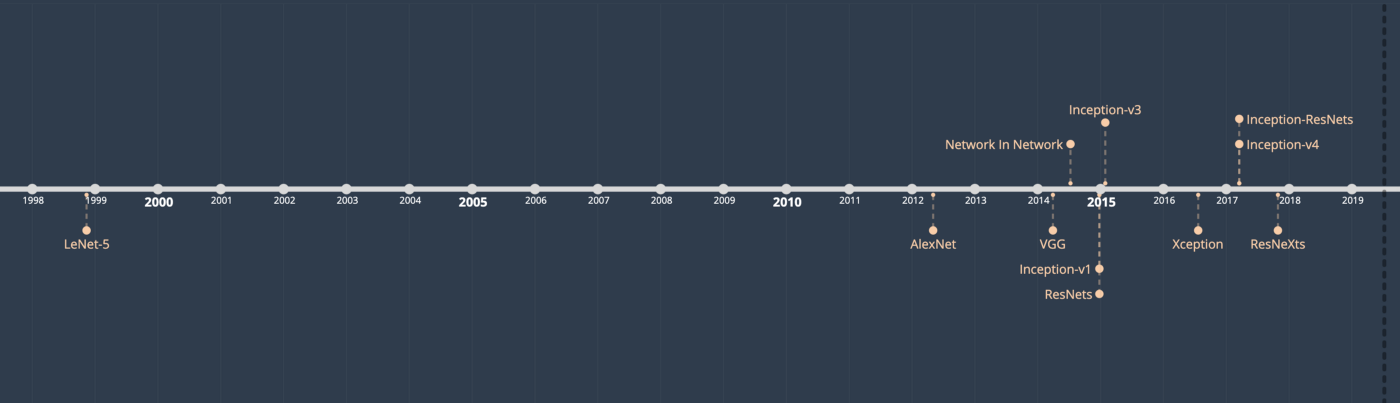

In [2]:
from IPython.display import Image
Image(filename='cnn_timeline.png')

## Mathematics
In order to understand the mathematics, all one really needs to do is look back at the idea developed in the 1959 with the "simple" and "complex" cells. Back then, they summed up the simple cells to make complex cells. Convolutional neural networks are much the same. *Keep this in mind as we discuss convolutions!!* When first seeing them they appear incredibly daunting but it will all devolve back to this simple concept.

### Convolutions
["[A] convolution is a mathematical operation on two functions (f and g) that produces a third function $(f * g)$ that expresses how the shape of one is modified by the other."](https://en.wikipedia.org/wiki/Convolution). Cross Correlations are the exact same, except that one of the functions is reflected about the y-axis. There are both "continous" and "discrete" definitions of convolutions. Because convolutional neural networks operate on a computer we will focus solely on the discrete definition of convolutions. The official equation for a discrete convolution bounded by $[-M, M]$ is:

$$
(f * g)[n] = \sum_{m = -M}^{M} f[n - m]g[m]
$$

This is just a complicated way of writing the dot product between two matrices. As we recall from calculus or matrix theory, a dot product is just:

$$
\textbf{a} \cdot \textbf{b} = \sum_{i=1}^{n} a_ib_i = a_1b_1 + a_2b_2 + ... + a_nb_n
$$

The discrete derivative of this operation is satisfied by a difference operator:

$$
D f(n) = f(n+1) - f(n) \\
D(f*g) = (Df) * g = f * (Dg)
$$

In convolutional neural networks, our two "functions" are the input values and the synaptic weights and they are convolved together to form a "feature map". This is where the idea of "shared weights" comes from. Instead of a unique weight for each input we actually share weights between inputs. We are adding all the small impacts together to form a more complex notation. To see a feature map being created via convolution checkout the animation [here](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53). The movement is controlled by the parameter called "stride". Longer strides results in a smaller feature map where shorter strides result in larger feature maps. Also, because convolutions require the same size for each function a lot of times the synaptic weight mask does not line up perfectly with inputs and we need to add "padding". Finally, we can spread out the mapping between inputs and weight masks. This is called dilation. These are all things that can be varied in most convolutional layer creations be it Pytorch or Tensorflow.

In [3]:
import torch.nn as nn  # Pytorch Implementation
nn.Conv1d(in_channels=1, out_channels=1, kernel_size=(3,3), stride=(1,1), padding=0, dilation=(1,1))
nn.Conv2d(in_channels=3, out_channels=3, kernel_size=(3,3), stride=(1,1), padding=0, dilation=(1,1))

import tensorflow as tf  # Tensorflow Implementation
tf.keras.layers.Conv1D(filters=3, kernel_size=3, strides=1, padding='valid', dilation_rate=1)
tf.keras.layers.Conv2D(filters=3, kernel_size=3, strides=1, padding='valid', dilation_rate=1)

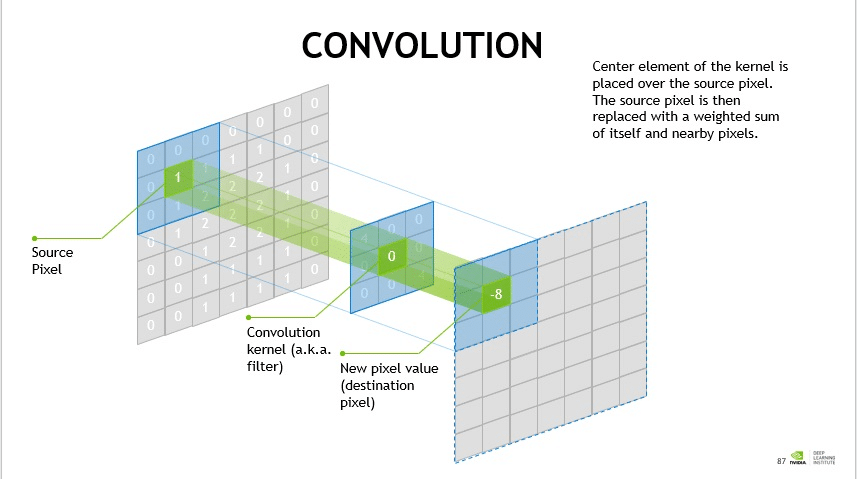

In [4]:
from IPython.display import Image
Image(filename='convolution.png')

## Ok, but what about Convolutional Neural Networks??
Well, convolutional neural networks (otherwise known as CNNs or ConvNets), are neural networks that contain convolutional layers. That's really all there is to them. Almost each one also contains fully connected feed forward layers at the end. So, a bit of advice, don't focus on convolutional neural networks as a whole but think of the layers. In doing so researchers are exploring the impacts of adding convolutional layers to networks with LSTM cells and building generative architectures such as Generative Adversarial Networks (GANs) and Variational AutoEncoders (VAEs) with them. Convolutional neural networks are incredibly important and have seen great success, especially in the computer vision field, but they are part of a whole. They are merely a layer in neural networks and a fragment of the deep learning research area.

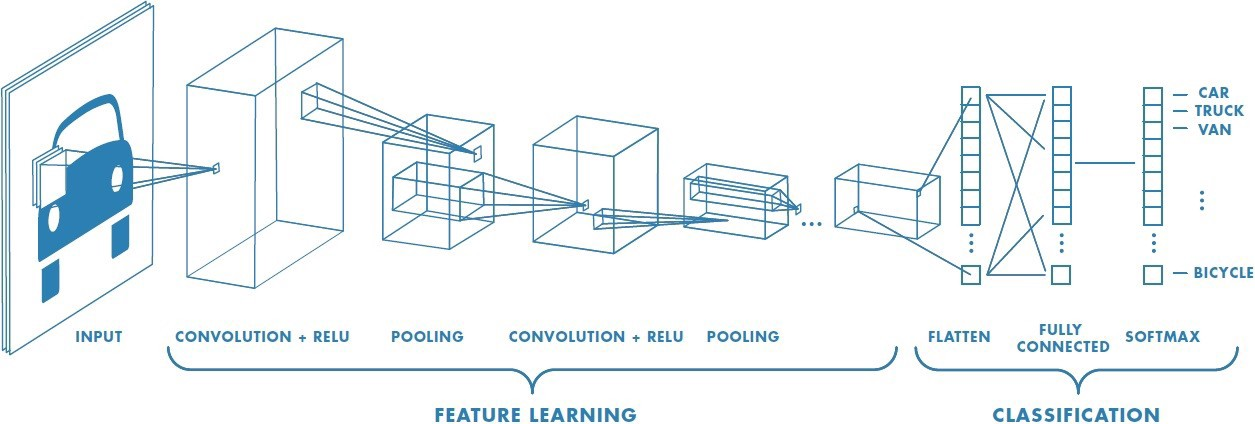

In [5]:
from IPython.display import Image
Image(filename='CNN.jpeg')